In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [2]:
from numpy.random import multinomial

def sample_series(series, n=1000):
    return multinomial(series.sum(), series/series.sum(), n)

In [3]:
import numpy as np

from lint_analysis.bin_counts.models import BinCount

def plot_sampled_series(token, w=5, h=5):
    
    series = BinCount.token_series(token)
    
    expected = series.sum() / len(series)
    samples = sample_series(np.full(len(series), expected))
    
    avg_std = samples.std(1).mean()

    plt.figure(figsize=(w,h))
    
    plt.plot([0, 100], [expected, expected], c='orange', lw=0.5)

    plt.fill_between(
        range(101),
        expected + 2*avg_std,
        expected - 2*avg_std,
        color='black',
        alpha=0.1,
    )
    
    print(token)
    
    plt.title(token)
    plt.xlabel('Narrative time')
    plt.xlabel('Word count')
    plt.plot(series)
    plt.show()

death


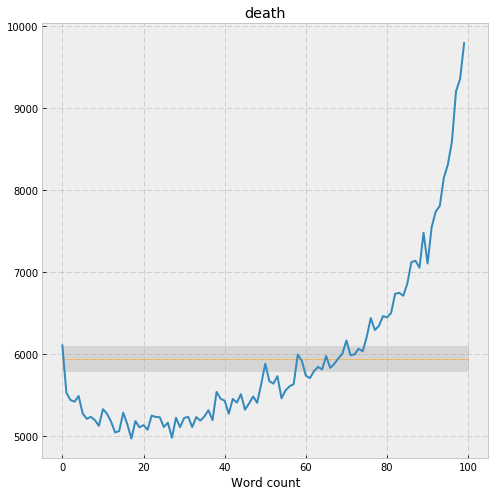

In [18]:
plot_sampled_series('death', 8, 8)

In [19]:
def bin_zscores(series):
    
    expected = series.sum() / len(series)
    samples = sample_series(np.full(len(series), expected))

    avg_std = samples.std(1).mean()

    return np.array([
        (observed-expected) / avg_std
        for observed in series
    ])

In [20]:
from scipy import stats

def series_chisquare(series):
    
    expected = series.sum() / len(series)
    uniform = np.full(len(series), expected)
    
    return stats.chisquare(series, uniform)

In [21]:
from joblib import Memory

mem = Memory('../cache')

token_counts = mem.cache(BinCount.token_counts)

tokens = token_counts(10000)

In [22]:
data = []
for i, (token, count) in enumerate(tokens.items()):
    
    series = BinCount.token_series(token)
    
    zscores = abs(bin_zscores(series))
    
    chi = series_chisquare(series)
    
    data.append(dict(
        token=token,
        count=count,
        zscore_sum=zscores.sum(),
        zscore_max=zscores.max(),
        chi_stat=chi.statistic,
        chi_p=chi.pvalue,
    ))
    
    if i%1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [23]:
import pandas as pd

pd.set_option('display.max_rows', 1000)

df = pd.DataFrame(data)

top_500_sum = df.sort_values('zscore_sum', ascending=False).head(500)
top_500_max = df.sort_values('zscore_max', ascending=False).head(500)

In [24]:
top_500_sum

,chi_p,chi_stat,count,token,zscore_max,zscore_sum
6,0.000000e+00,83315.424513,44510387,a,110.732616,2247.506232
15,0.000000e+00,96863.255295,20487595,you,210.132120,1937.942037
8,0.000000e+00,76599.976262,32574587,i,174.181255,1778.422040
7,0.000000e+00,101300.818804,34933931,”,245.733314,1773.420500
2,0.000000e+00,78820.650937,111130017,the,223.416127,1550.275319
5,0.000000e+00,81168.949273,50833243,of,225.899836,1478.460844
163,0.000000e+00,31014.265564,1518368,young,53.946883,1441.260369
23,0.000000e+00,50347.668391,12766593,?,150.858045,1438.904731
1,0.000000e+00,56904.238443,115472128,.,165.057417,1432.075523
216,0.000000e+00,44230.570497,1147028,years,118.053356,1387.758367


In [25]:
top_500_max

,chi_p,chi_stat,count,token,zscore_max,zscore_sum
446,0.000000e+00,136700.921457,452057,chapter,368.071170,748.038059
1842,0.000000e+00,69649.772190,95391,i.,264.435545,543.333055
7,0.000000e+00,101300.818804,34933931,”,245.733314,1773.420500
5,0.000000e+00,81168.949273,50833243,of,225.899836,1478.460844
2,0.000000e+00,78820.650937,111130017,the,223.416127,1550.275319
15,0.000000e+00,96863.255295,20487595,you,210.132120,1937.942037
8,0.000000e+00,76599.976262,32574587,i,174.181255,1778.422040
19,0.000000e+00,49126.156959,16921467,“,170.269303,1221.261020
1,0.000000e+00,56904.238443,115472128,.,165.057417,1432.075523
23,0.000000e+00,50347.668391,12766593,?,150.858045,1438.904731


In [29]:
', '.join(list(top_500_sum['token']))

'a, you, i, ”, the, of, young, ?, ., years, !, me, him, “, school, iii, love, will, father, mother, to, ii, 3, hair, said, now, he, death, 2, she, ,, what, do, god, iv., that, have, age, and, boy, tall, ", vii, dead, girls, it, not, viii, an, 6, old, girl, year, ix, again, family, letter, miss, college, we, 5, small, told, large, chapter, blue, heart, his, or, if, kill, always, life, think, like, don’t, know, could, brown, joy, killed, its, die, little, happiness, books, boys, tell, forgive, would, gun, prisoner, in, 8, loved, your, has, xii, handsome, had, arms, black, ), back, xiii, older, trial, new, last, (, about, did, pretty, done, tears, jury, xx, stranger, aunt, pain, can, liked, xix, beauty, mrs., be, happy, rather, shall, must, big, saw, younger, —, is, youth, cried, prison, nose, children, which, 9, good, with, 7, class, vi, ’, dying, gone, go, her, still, project, xviii, father’s, witness, lived, rich, us, then, i., xvii, often, usually, green, table, evidence, most, broad,

In [30]:
', '.join(list(top_500_max['token']))

'chapter, i., ”, of, the, you, i, “, ., ?, said, she, its, years, he, ", 3, me, a, love, 2, him, author, ii, published, to, project, happy, edition, |, do, ), (, !, her, in, your, what, end, life, know, wedding, happiness, which, bride, will, 9, by, *, ’, 1, age, year, tall, have, iii, joy, think, did, distributed, and, city, don’t, book, new, blue, 5, it, century, was, fiction, york, not, we, n’t, if, readers, summer, green, hills, reader, asked, contents, god, go, arms, their, ·, that, kissed, broad, sun, peace, novel, be, “you, world, hair, village, would, tell, brown, mr., from, can, ‘, has, young, see, novels, whose, 7, river, west, gray, &, ,, valley, loved, black, 6, l, could, early, story, want, wife, tears, death, land, north, small, 8, town, last, an, heart, but, went, sky, born, old, trees, married, vii, n\'t, sea, must, then, large, got, or, told, south, dark, street, :, characters, mountains, media, high, forever, white, history, june, oh, western, houses, dear, viii, _, b

could


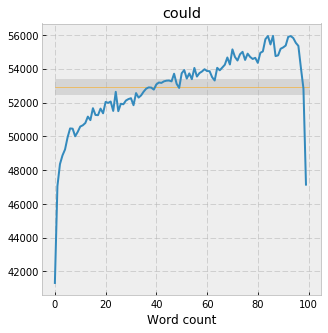

In [4]:
plot_sampled_series('could')